In [1]:
import pandas as pd
import os
from project.dataset import Dataset, VALDODataset
from project.preprocessing import z_score_normalization, min_max_normalization, NiftiToTensorTransform
from project.training import split_train_val_datasets
from project.utils import collate_fn, plot_all_slices, plot_all_slices_from_array
from torch.utils.data import DataLoader
import torch
from project.model import VisionTransformer
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F

In [2]:
d_model = 2
n_classes = 2
img_size = (16,16)
patch_size = (16,16)
n_channels = 1
n_heads = 2
n_layers = 3
batch_size = 1
epochs = 3
alpha = 0.004

In [3]:
ds = Dataset()

In [4]:
masks = ds.load_cmb_masks()
cases = ds.load_skullstripped_mri()
# cases = ds.load_raw_mri(cohort_num=1)

In [5]:
transform = NiftiToTensorTransform(target_shape=(512,512))

In [6]:
dataset = VALDODataset(
    cases=cases, 
    masks=masks, 
    transform=transform,
    normalization=z_score_normalization
)

In [7]:
sample_output = [
    
]

In [8]:
# cropped_locations = dataset.get_cropped_locations(img=dataset[0][0], x_min=164, y_min=327, x_max=172, y_max=336)
cropped_locations = dataset.get_cropped_locations(img=dataset[0][0], x_min=160, y_min=324, x_max=176, y_max=340)

In [9]:
cropped_labels = dataset.get_cropped_locations(img=dataset[0][1], x_min=263, y_min=215, x_max=279, y_max=231)

In [10]:
# import matplotlib.pyplot as plt
# for i, img in enumerate(cropped_labels):
#     plt.imshow(img, cmap='gray')
#     plt.title(f'Slice {i}')
#     plt.show()

In [11]:
cropped_labels.__len__()

1

In [12]:
print(cropped_labels.__len__())

1


In [13]:
print(type(dataset))
print(len(dataset))

<class 'project.dataset.valdo.VALDODataset'>
72


In [14]:
has_cmb = [1 if count > 0 else 0 for count in dataset.cmb_counts]

df_dataset = pd.DataFrame({
    'MRI Scans': dataset.cases,
    'Segmented Masks': dataset.masks,
    'CMB Count': dataset.cmb_counts,
    'Has CMB': has_cmb
})

In [15]:
train_dataset, val_dataset = split_train_val_datasets(
    df=df_dataset, 
    transform=transform
)

In [16]:
train_loader = DataLoader(
    train_dataset, 
    shuffle=True, 
    batch_size=batch_size,
    collate_fn=collate_fn
)

test_loader = DataLoader(
    val_dataset, 
    shuffle=False, 
    batch_size=batch_size,
    collate_fn=collate_fn
)

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [18]:
transformer = VisionTransformer(
    d_model=d_model,
    n_classes=n_classes,
    img_size=img_size,
    patch_size=patch_size,
    n_channels=n_channels,
    n_heads=n_heads,
    n_layers=n_layers,
    device=device
)

In [19]:
transformer = transformer.to(device)

In [20]:
optimizer = Adam(transformer.parameters(), lr=alpha)
criterion = nn.CrossEntropyLoss()

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch 1/3 loss: 0.000:   0%|          | 0/57 [00:00<?, ?it/s]

-----------------------
Learning case 0 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])


Epoch 1/3 loss: 0.000:   2%|▏         | 1/57 [00:03<02:58,  3.19s/it]

Loss:  tensor(0.9494, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:   4%|▎         | 2/57 [00:03<01:23,  1.52s/it]

-----------------------
Learning case 1 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.4181, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])
-----------------------
Learning case 2 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])
Shape after reshaping: torch.Size([1, 2, 36, 1])
Loss

Epoch 1/3 loss: 0.000:   7%|▋         | 4/57 [00:03<00:32,  1.61it/s]

-----------------------
Learning case 3 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7409, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:   9%|▉         | 5/57 [00:05<00:56,  1.08s/it]

-----------------------
Learning case 4 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(21.6157, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  11%|█         | 6/57 [00:07<01:10,  1.38s/it]

-----------------------
Learning case 5 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(55.0694, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  12%|█▏        | 7/57 [00:08<00:50,  1.01s/it]

-----------------------
Learning case 6 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8355, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  14%|█▍        | 8/57 [00:08<00:37,  1.30it/s]

-----------------------
Learning case 7 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.1322, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])
-----------------------
Learning case 8 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss

Epoch 1/3 loss: 0.000:  18%|█▊        | 10/57 [00:08<00:21,  2.14it/s]

-----------------------
Learning case 9 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.6714, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  19%|█▉        | 11/57 [00:10<00:41,  1.10it/s]

-----------------------
Learning case 10 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(364.4718, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  21%|██        | 12/57 [00:12<00:56,  1.27s/it]

-----------------------
Learning case 11 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(461.7937, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  23%|██▎       | 13/57 [00:14<01:06,  1.51s/it]

-----------------------
Learning case 12 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(515.1391, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  25%|██▍       | 14/57 [00:16<01:11,  1.66s/it]

-----------------------
Learning case 13 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(110.0192, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  26%|██▋       | 15/57 [00:18<01:15,  1.80s/it]

-----------------------
Learning case 14 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(77.5246, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  28%|██▊       | 16/57 [00:19<00:57,  1.39s/it]

-----------------------
Learning case 15 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.0835, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  30%|██▉       | 17/57 [00:21<01:02,  1.57s/it]

-----------------------
Learning case 16 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(118.4818, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  32%|███▏      | 18/57 [00:23<01:05,  1.68s/it]

-----------------------
Learning case 17 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(176.3077, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  33%|███▎      | 19/57 [00:23<00:49,  1.31s/it]

-----------------------
Learning case 18 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(5.5771, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  35%|███▌      | 20/57 [00:25<00:55,  1.50s/it]

-----------------------
Learning case 19 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(230.0854, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  37%|███▋      | 21/57 [00:26<00:42,  1.17s/it]

-----------------------
Learning case 20 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(4.6703, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  39%|███▊      | 22/57 [00:28<00:49,  1.42s/it]

-----------------------
Learning case 21 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(190.9856, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  40%|████      | 23/57 [00:28<00:37,  1.12s/it]

-----------------------
Learning case 22 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(8.0045, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  42%|████▏     | 24/57 [00:28<00:30,  1.08it/s]

-----------------------
Learning case 23 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(3.8759, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  44%|████▍     | 25/57 [00:29<00:24,  1.30it/s]

-----------------------
Learning case 24 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(5.4744, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  46%|████▌     | 26/57 [00:31<00:36,  1.16s/it]

-----------------------
Learning case 25 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(164.8754, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  47%|████▋     | 27/57 [00:33<00:44,  1.47s/it]

-----------------------
Learning case 26 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(157.7012, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  49%|████▉     | 28/57 [00:35<00:46,  1.59s/it]

-----------------------
Learning case 27 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(221.4057, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  51%|█████     | 29/57 [00:35<00:33,  1.18s/it]

-----------------------
Learning case 28 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.3671, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  53%|█████▎    | 30/57 [00:35<00:24,  1.09it/s]

-----------------------
Learning case 29 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.5347, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])
-----------------------
Learning case 30 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])
Shape after reshaping: torch.Size([1, 2, 36, 1])
Lo

Epoch 1/3 loss: 0.000:  56%|█████▌    | 32/57 [00:38<00:27,  1.09s/it]

-----------------------
Learning case 31 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(138.4337, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  58%|█████▊    | 33/57 [00:38<00:20,  1.20it/s]

-----------------------
Learning case 32 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7354, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  60%|█████▉    | 34/57 [00:38<00:15,  1.51it/s]

-----------------------
Learning case 33 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7022, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  61%|██████▏   | 35/57 [00:38<00:11,  1.90it/s]

-----------------------
Learning case 34 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8421, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  63%|██████▎   | 36/57 [00:39<00:09,  2.32it/s]

-----------------------
Learning case 35 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.9808, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  65%|██████▍   | 37/57 [00:41<00:17,  1.12it/s]

-----------------------
Learning case 36 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(124.7744, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  67%|██████▋   | 38/57 [00:42<00:21,  1.11s/it]

-----------------------
Learning case 37 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(92.8044, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  68%|██████▊   | 39/57 [00:44<00:24,  1.35s/it]

-----------------------
Learning case 38 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(50.3319, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  70%|███████   | 40/57 [00:45<00:18,  1.09s/it]

-----------------------
Learning case 39 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.6094, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  72%|███████▏  | 41/57 [00:45<00:13,  1.20it/s]

-----------------------
Learning case 40 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.2997, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  74%|███████▎  | 42/57 [00:47<00:18,  1.22s/it]

-----------------------
Learning case 41 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(61.5251, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  75%|███████▌  | 43/57 [00:47<00:12,  1.08it/s]

-----------------------
Learning case 42 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8947, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  77%|███████▋  | 44/57 [00:47<00:09,  1.38it/s]

-----------------------
Learning case 43 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.3468, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  79%|███████▉  | 45/57 [00:49<00:13,  1.12s/it]

-----------------------
Learning case 44 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(54.0687, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  81%|████████  | 46/57 [00:50<00:09,  1.13it/s]

-----------------------
Learning case 45 slice 0
Shape before patch: torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 49, 2])
Shape after patch: torch.Size([1, 1, 49, 16, 16])
Shape after positional: torch.Size([1, 1, 49, 16, 16])
Shape after transformer: torch.Size([1, 1, 49, 16, 16])
Input shape before classification: torch.Size([1, 50, 2])
Shape after reshaping: torch.Size([1, 2, 49, 1])
Loss:  tensor(1.1945, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 2, 784, 16])


Epoch 1/3 loss: 0.000:  82%|████████▏ | 47/57 [00:52<00:12,  1.22s/it]

-----------------------
Learning case 46 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(406.2797, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  84%|████████▍ | 48/57 [00:52<00:08,  1.02it/s]

-----------------------
Learning case 47 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.8012, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  86%|████████▌ | 49/57 [00:52<00:06,  1.32it/s]

-----------------------
Learning case 48 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8871, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  88%|████████▊ | 50/57 [00:54<00:07,  1.13s/it]

-----------------------
Learning case 49 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(111.4893, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  89%|████████▉ | 51/57 [00:55<00:05,  1.13it/s]

-----------------------
Learning case 50 slice 0
Shape before patch: torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 48, 2])
Shape after patch: torch.Size([1, 1, 48, 16, 16])
Shape after positional: torch.Size([1, 1, 48, 16, 16])
Shape after transformer: torch.Size([1, 1, 48, 16, 16])
Input shape before classification: torch.Size([1, 49, 2])
Shape after reshaping: torch.Size([1, 2, 48, 1])
Loss:  tensor(1.1408, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 2, 768, 16])


Epoch 1/3 loss: 0.000:  91%|█████████ | 52/57 [00:55<00:03,  1.33it/s]

-----------------------
Learning case 51 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.0794, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 1/3 loss: 0.000:  93%|█████████▎| 53/57 [00:55<00:02,  1.70it/s]

-----------------------
Learning case 52 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8730, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 1/3 loss: 0.000:  95%|█████████▍| 54/57 [00:57<00:03,  1.01s/it]

-----------------------
Learning case 53 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(81.8149, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  96%|█████████▋| 55/57 [00:59<00:02,  1.28s/it]

-----------------------
Learning case 54 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(125.9955, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000:  98%|█████████▊| 56/57 [01:01<00:01,  1.46s/it]

-----------------------
Learning case 55 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(147.3050, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 1/3 loss: 0.000: 100%|██████████| 57/57 [01:03<00:00,  1.12s/it]


-----------------------
Learning case 56 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(41.1755, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])
Epoch 1/3 loss: 4361.631


Epoch 2/3 loss: 0.000:   2%|▏         | 1/57 [00:00<00:16,  3.32it/s]

-----------------------
Learning case 0 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7507, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:   4%|▎         | 2/57 [00:02<01:11,  1.29s/it]

-----------------------
Learning case 1 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(80.5012, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:   5%|▌         | 3/57 [00:02<00:44,  1.22it/s]

-----------------------
Learning case 2 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.9461, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:   7%|▋         | 4/57 [00:02<00:31,  1.69it/s]

-----------------------
Learning case 3 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.2849, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:   9%|▉         | 5/57 [00:03<00:23,  2.17it/s]

-----------------------
Learning case 4 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.9939, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  11%|█         | 6/57 [00:05<00:52,  1.02s/it]

-----------------------
Learning case 5 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(127.3199, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  12%|█▏        | 7/57 [00:05<00:41,  1.21it/s]

-----------------------
Learning case 6 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.4879, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  14%|█▍        | 8/57 [00:07<00:58,  1.18s/it]

-----------------------
Learning case 7 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(117.9568, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  16%|█▌        | 9/57 [00:07<00:43,  1.11it/s]

-----------------------
Learning case 8 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.8283, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  18%|█▊        | 10/57 [00:09<00:57,  1.22s/it]

-----------------------
Learning case 9 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(201.5159, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  19%|█▉        | 11/57 [00:09<00:42,  1.09it/s]

-----------------------
Learning case 10 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.0692, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  21%|██        | 12/57 [00:11<00:56,  1.25s/it]

-----------------------
Learning case 11 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(154.2335, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  23%|██▎       | 13/57 [00:12<00:41,  1.05it/s]

-----------------------
Learning case 12 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.1520, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  25%|██▍       | 14/57 [00:12<00:32,  1.34it/s]

-----------------------
Learning case 13 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.5399, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])
-----------------------
Learning case 14 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])


Epoch 2/3 loss: 0.000:  26%|██▋       | 15/57 [00:12<00:24,  1.72it/s]

Shape after reshaping: torch.Size([1, 2, 36, 1])
Loss:  tensor(1.0847, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 2, 576, 16])


Epoch 2/3 loss: 0.000:  28%|██▊       | 16/57 [00:14<00:40,  1.01it/s]

-----------------------
Learning case 15 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(272.9437, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  30%|██▉       | 17/57 [00:16<00:50,  1.26s/it]

-----------------------
Learning case 16 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(261.2107, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  32%|███▏      | 18/57 [00:18<00:56,  1.46s/it]

-----------------------
Learning case 17 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(357.0380, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  33%|███▎      | 19/57 [00:20<01:01,  1.61s/it]

-----------------------
Learning case 18 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(143.2276, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  35%|███▌      | 20/57 [00:22<01:03,  1.72s/it]

-----------------------
Learning case 19 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(112.6867, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  37%|███▋      | 21/57 [00:22<00:45,  1.27s/it]

-----------------------
Learning case 20 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7944, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  39%|███▊      | 22/57 [00:24<00:56,  1.61s/it]

-----------------------
Learning case 21 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(161.7528, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  40%|████      | 23/57 [00:25<00:43,  1.28s/it]

-----------------------
Learning case 22 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.4947, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  42%|████▏     | 24/57 [00:25<00:32,  1.03it/s]

-----------------------
Learning case 23 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.2470, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  44%|████▍     | 25/57 [00:26<00:26,  1.23it/s]

-----------------------
Learning case 24 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(4.2233, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  46%|████▌     | 26/57 [00:27<00:34,  1.10s/it]

-----------------------
Learning case 25 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(85.6625, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  47%|████▋     | 27/57 [00:29<00:40,  1.36s/it]

-----------------------
Learning case 26 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(319.0286, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  49%|████▉     | 28/57 [00:30<00:30,  1.04s/it]

-----------------------
Learning case 27 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(2.6424, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  51%|█████     | 29/57 [00:30<00:22,  1.25it/s]

-----------------------
Learning case 28 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.5883, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  53%|█████▎    | 30/57 [00:30<00:17,  1.58it/s]

-----------------------
Learning case 29 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])
Shape after reshaping: torch.Size([1, 2, 36, 1])
Loss:  tensor(2.0574, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 2, 576, 16])


Epoch 2/3 loss: 0.000:  54%|█████▍    | 31/57 [00:31<00:13,  1.89it/s]

-----------------------
Learning case 30 slice 0
Shape before patch: torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 49, 2])
Shape after patch: torch.Size([1, 1, 49, 16, 16])
Shape after positional: torch.Size([1, 1, 49, 16, 16])
Shape after transformer: torch.Size([1, 1, 49, 16, 16])
Input shape before classification: torch.Size([1, 50, 2])
Shape after reshaping: torch.Size([1, 2, 49, 1])
Loss:  tensor(1.7525, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 2, 784, 16])


Epoch 2/3 loss: 0.000:  56%|█████▌    | 32/57 [00:31<00:12,  1.98it/s]

-----------------------
Learning case 31 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.7837, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  58%|█████▊    | 33/57 [00:33<00:22,  1.06it/s]

-----------------------
Learning case 32 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(326.6945, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  60%|█████▉    | 34/57 [00:33<00:18,  1.24it/s]

-----------------------
Learning case 33 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.6028, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  61%|██████▏   | 35/57 [00:34<00:14,  1.55it/s]

-----------------------
Learning case 34 slice 0
Shape before patch: torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 48, 2])
Shape after patch: torch.Size([1, 1, 48, 16, 16])
Shape after positional: torch.Size([1, 1, 48, 16, 16])
Shape after transformer: torch.Size([1, 1, 48, 16, 16])
Input shape before classification: torch.Size([1, 49, 2])
Shape after reshaping: torch.Size([1, 2, 48, 1])
Loss:  tensor(1.9750, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 2, 768, 16])


Epoch 2/3 loss: 0.000:  63%|██████▎   | 36/57 [00:34<00:12,  1.71it/s]

-----------------------
Learning case 35 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.9766, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  65%|██████▍   | 37/57 [00:36<00:20,  1.02s/it]

-----------------------
Learning case 36 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(62.8855, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  67%|██████▋   | 38/57 [00:38<00:25,  1.33s/it]

-----------------------
Learning case 37 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(159.3772, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  68%|██████▊   | 39/57 [00:39<00:19,  1.06s/it]

-----------------------
Learning case 38 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.5177, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  70%|███████   | 40/57 [00:41<00:22,  1.34s/it]

-----------------------
Learning case 39 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(109.7439, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  72%|███████▏  | 41/57 [00:43<00:24,  1.52s/it]

-----------------------
Learning case 40 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(113.4056, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  74%|███████▎  | 42/57 [00:45<00:24,  1.66s/it]

-----------------------
Learning case 41 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(104.1090, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  75%|███████▌  | 43/57 [00:46<00:24,  1.73s/it]

-----------------------
Learning case 42 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(44.2056, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  77%|███████▋  | 44/57 [00:47<00:17,  1.31s/it]

-----------------------
Learning case 43 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7506, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])
-----------------------
Learning case 44 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])


Epoch 2/3 loss: 0.000:  79%|███████▉  | 45/57 [00:47<00:11,  1.02it/s]

Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7495, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  81%|████████  | 46/57 [00:49<00:14,  1.31s/it]

-----------------------
Learning case 45 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(207.6724, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  82%|████████▏ | 47/57 [00:51<00:15,  1.52s/it]

-----------------------
Learning case 46 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(181.5607, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  84%|████████▍ | 48/57 [00:51<00:10,  1.15s/it]

-----------------------
Learning case 47 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.9202, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  86%|████████▌ | 49/57 [00:53<00:11,  1.43s/it]

-----------------------
Learning case 48 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(54.8846, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  88%|████████▊ | 50/57 [00:54<00:07,  1.14s/it]

-----------------------
Learning case 49 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(3.4863, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  89%|████████▉ | 51/57 [00:56<00:08,  1.42s/it]

-----------------------
Learning case 50 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(21.6148, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  91%|█████████ | 52/57 [00:56<00:05,  1.13s/it]

-----------------------
Learning case 51 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.0859, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  93%|█████████▎| 53/57 [00:57<00:03,  1.16it/s]

-----------------------
Learning case 52 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(1.4239, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000:  95%|█████████▍| 54/57 [00:57<00:02,  1.34it/s]

-----------------------
Learning case 53 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.9342, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 2, 560, 16])


Epoch 2/3 loss: 0.000:  96%|█████████▋| 55/57 [00:59<00:02,  1.11s/it]

-----------------------
Learning case 54 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(121.4123, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])


Epoch 2/3 loss: 0.000:  98%|█████████▊| 56/57 [00:59<00:00,  1.16it/s]

-----------------------
Learning case 55 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7021, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 2, 624, 16])


Epoch 2/3 loss: 0.000: 100%|██████████| 57/57 [01:01<00:00,  1.09s/it]


-----------------------
Learning case 56 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(40.5587, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 2, 3072, 16])
Epoch 2/3 loss: 3997.049


Epoch 3/3 loss: 0.000:   0%|          | 0/57 [00:00<?, ?it/s]

-----------------------
Learning case 0 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(0.9136, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


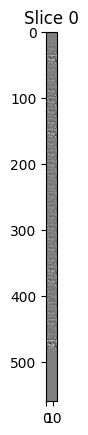

Epoch 3/3 loss: 0.000:   2%|▏         | 1/57 [00:00<00:31,  1.77it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 1 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(11.7244, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


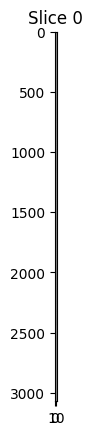

Epoch 3/3 loss: 0.000:   4%|▎         | 2/57 [00:02<01:25,  1.55s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 2 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6627, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


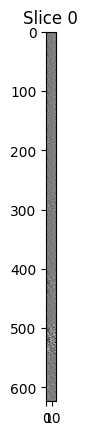

Epoch 3/3 loss: 0.000:   5%|▌         | 3/57 [00:03<00:54,  1.01s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 3 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(36.6060, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


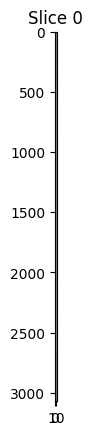

Epoch 3/3 loss: 0.000:   7%|▋         | 4/57 [00:05<01:17,  1.47s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 4 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(0.7679, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


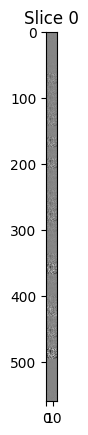

Epoch 3/3 loss: 0.000:   9%|▉         | 5/57 [00:05<00:58,  1.13s/it]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 5 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6860, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


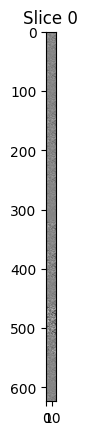

Epoch 3/3 loss: 0.000:  11%|█         | 6/57 [00:06<00:44,  1.14it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 6 slice 0
Shape before patch: torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 1, 48, 16, 16])
torch.Size([1, 48, 2])
Shape after patch: torch.Size([1, 1, 48, 16, 16])
Shape after positional: torch.Size([1, 1, 48, 16, 16])
Shape after transformer: torch.Size([1, 1, 48, 16, 16])
Input shape before classification: torch.Size([1, 49, 2])
Shape after reshaping: torch.Size([1, 2, 48, 1])
Loss:  tensor(0.6991, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 48, 16, 16])


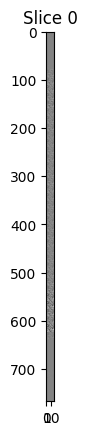

Epoch 3/3 loss: 0.000:  12%|█▏        | 7/57 [00:06<00:37,  1.35it/s]

torch.Size([1, 2, 768, 16])
-----------------------
Learning case 7 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6975, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


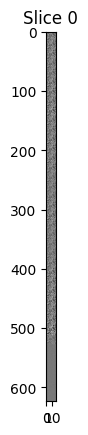

Epoch 3/3 loss: 0.000:  14%|█▍        | 8/57 [00:07<00:30,  1.62it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 8 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6695, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


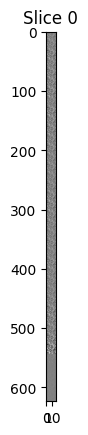

Epoch 3/3 loss: 0.000:  16%|█▌        | 9/57 [00:07<00:25,  1.89it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 9 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(34.3065, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


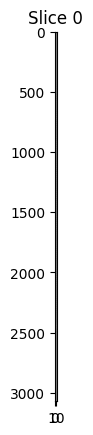

Epoch 3/3 loss: 0.000:  18%|█▊        | 10/57 [00:09<00:47,  1.01s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 10 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(22.5076, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


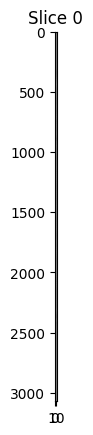

Epoch 3/3 loss: 0.000:  19%|█▉        | 11/57 [00:11<01:01,  1.33s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 11 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7349, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


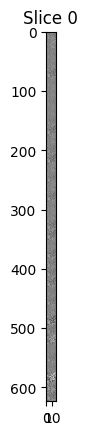

Epoch 3/3 loss: 0.000:  21%|██        | 12/57 [00:11<00:47,  1.05s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 12 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(32.6187, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


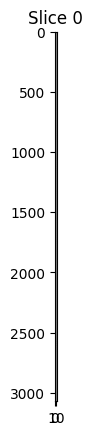

Epoch 3/3 loss: 0.000:  23%|██▎       | 13/57 [00:14<01:00,  1.38s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 13 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(35.7863, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


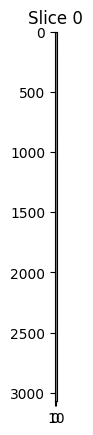

Epoch 3/3 loss: 0.000:  25%|██▍       | 14/57 [00:16<01:08,  1.58s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 14 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(12.8560, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


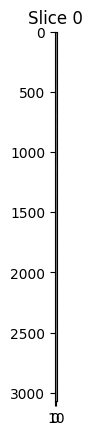

Epoch 3/3 loss: 0.000:  26%|██▋       | 15/57 [00:18<01:12,  1.72s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 15 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(64.5820, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


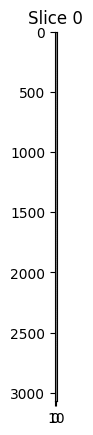

Epoch 3/3 loss: 0.000:  28%|██▊       | 16/57 [00:20<01:16,  1.86s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 16 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7522, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


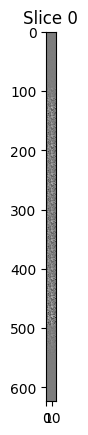

Epoch 3/3 loss: 0.000:  30%|██▉       | 17/57 [00:20<00:56,  1.40s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 17 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6981, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


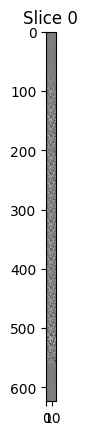

Epoch 3/3 loss: 0.000:  32%|███▏      | 18/57 [00:21<00:42,  1.10s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 18 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(118.2102, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


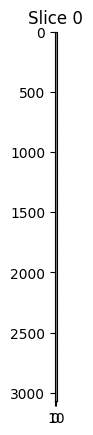

Epoch 3/3 loss: 0.000:  33%|███▎      | 19/57 [00:23<00:53,  1.40s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 19 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(22.4308, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


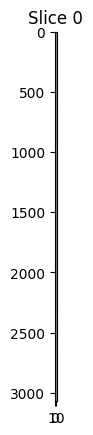

Epoch 3/3 loss: 0.000:  35%|███▌      | 20/57 [00:25<00:59,  1.62s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 20 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7572, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


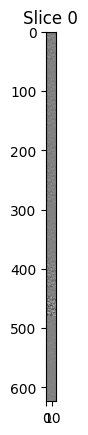

Epoch 3/3 loss: 0.000:  37%|███▋      | 21/57 [00:25<00:45,  1.27s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 21 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(60.8417, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


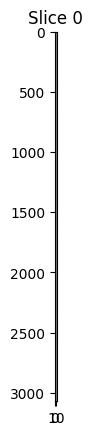

Epoch 3/3 loss: 0.000:  39%|███▊      | 22/57 [00:27<00:53,  1.52s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 22 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])
Shape after reshaping: torch.Size([1, 2, 36, 1])
Loss:  tensor(0.7619, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 36, 16, 16])


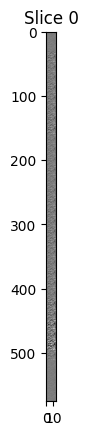

Epoch 3/3 loss: 0.000:  40%|████      | 23/57 [00:28<00:40,  1.18s/it]

torch.Size([1, 2, 576, 16])
-----------------------
Learning case 23 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(51.4779, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


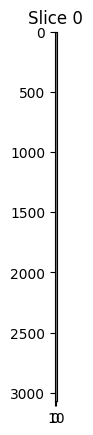

Epoch 3/3 loss: 0.000:  42%|████▏     | 24/57 [00:30<00:47,  1.45s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 24 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(0.8066, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


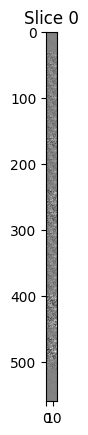

Epoch 3/3 loss: 0.000:  44%|████▍     | 25/57 [00:30<00:37,  1.16s/it]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 25 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7507, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


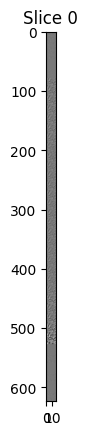

Epoch 3/3 loss: 0.000:  46%|████▌     | 26/57 [00:31<00:28,  1.08it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 26 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7962, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


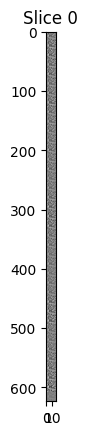

Epoch 3/3 loss: 0.000:  47%|████▋     | 27/57 [00:31<00:22,  1.31it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 27 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(2.8605, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


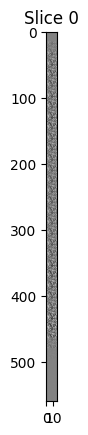

Epoch 3/3 loss: 0.000:  49%|████▉     | 28/57 [00:32<00:19,  1.46it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 28 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.8415, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


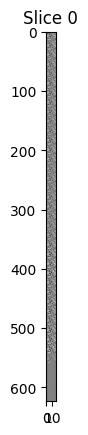

Epoch 3/3 loss: 0.000:  51%|█████     | 29/57 [00:32<00:16,  1.66it/s]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 29 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(68.8462, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


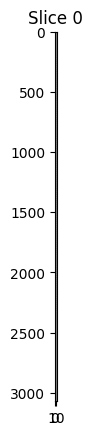

Epoch 3/3 loss: 0.000:  53%|█████▎    | 30/57 [00:34<00:28,  1.07s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 30 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.1328, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


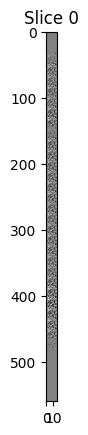

Epoch 3/3 loss: 0.000:  54%|█████▍    | 31/57 [00:35<00:23,  1.10it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 31 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(101.1327, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


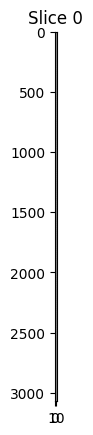

Epoch 3/3 loss: 0.000:  56%|█████▌    | 32/57 [00:37<00:32,  1.28s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 32 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(32.8959, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


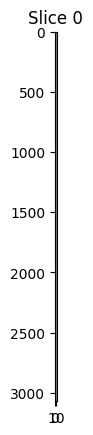

Epoch 3/3 loss: 0.000:  58%|█████▊    | 33/57 [00:39<00:36,  1.53s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 33 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6847, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


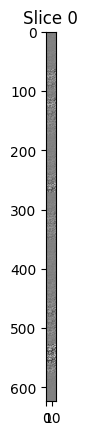

Epoch 3/3 loss: 0.000:  60%|█████▉    | 34/57 [00:39<00:27,  1.19s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 34 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(36.4255, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


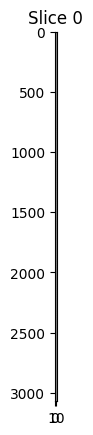

Epoch 3/3 loss: 0.000:  61%|██████▏   | 35/57 [00:42<00:32,  1.48s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 35 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.6973, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


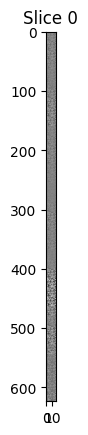

Epoch 3/3 loss: 0.000:  63%|██████▎   | 36/57 [00:42<00:24,  1.18s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 36 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.0259, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


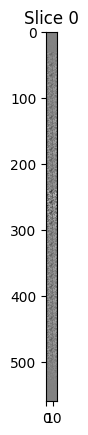

Epoch 3/3 loss: 0.000:  65%|██████▍   | 37/57 [00:43<00:19,  1.01it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 37 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.1273, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


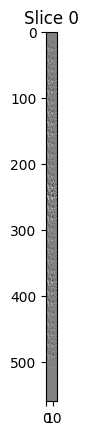

Epoch 3/3 loss: 0.000:  67%|██████▋   | 38/57 [00:43<00:16,  1.17it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 38 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.2139, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


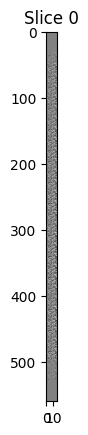

Epoch 3/3 loss: 0.000:  68%|██████▊   | 39/57 [00:44<00:13,  1.33it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 39 slice 0
Shape before patch: torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 1, 49, 16, 16])
torch.Size([1, 49, 2])
Shape after patch: torch.Size([1, 1, 49, 16, 16])
Shape after positional: torch.Size([1, 1, 49, 16, 16])
Shape after transformer: torch.Size([1, 1, 49, 16, 16])
Input shape before classification: torch.Size([1, 50, 2])
Shape after reshaping: torch.Size([1, 2, 49, 1])
Loss:  tensor(0.8112, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 49, 16, 16])


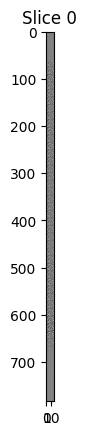

Epoch 3/3 loss: 0.000:  70%|███████   | 40/57 [00:44<00:10,  1.57it/s]

torch.Size([1, 2, 784, 16])
-----------------------
Learning case 40 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(95.2023, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


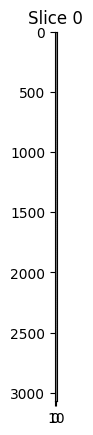

Epoch 3/3 loss: 0.000:  72%|███████▏  | 41/57 [00:46<00:17,  1.08s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 41 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(225.8550, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


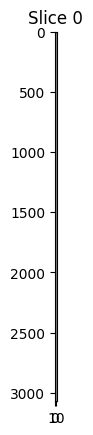

Epoch 3/3 loss: 0.000:  74%|███████▎  | 42/57 [00:48<00:19,  1.31s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 42 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.9095, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


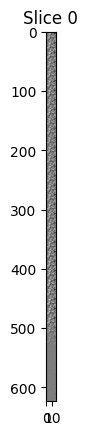

Epoch 3/3 loss: 0.000:  75%|███████▌  | 43/57 [00:48<00:14,  1.02s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 43 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(64.3076, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


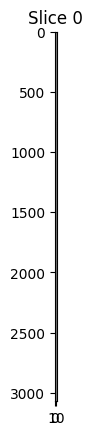

Epoch 3/3 loss: 0.000:  77%|███████▋  | 44/57 [00:50<00:17,  1.35s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 44 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(52.7216, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


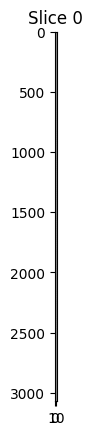

Epoch 3/3 loss: 0.000:  79%|███████▉  | 45/57 [00:53<00:19,  1.58s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 45 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(11.5948, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


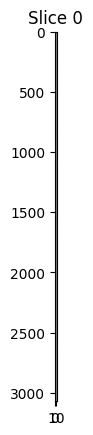

Epoch 3/3 loss: 0.000:  81%|████████  | 46/57 [00:55<00:19,  1.74s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 46 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(44.7220, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


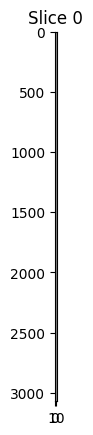

Epoch 3/3 loss: 0.000:  82%|████████▏ | 47/57 [00:57<00:18,  1.87s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 47 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(44.7889, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


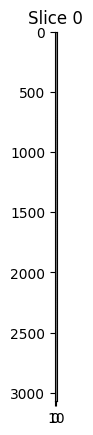

Epoch 3/3 loss: 0.000:  84%|████████▍ | 48/57 [00:59<00:17,  1.97s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 48 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(57.3918, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


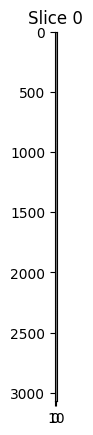

Epoch 3/3 loss: 0.000:  86%|████████▌ | 49/57 [01:01<00:16,  2.10s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 49 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7127, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


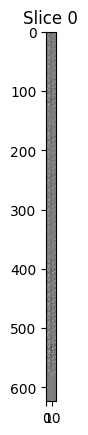

Epoch 3/3 loss: 0.000:  88%|████████▊ | 50/57 [01:02<00:11,  1.60s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 50 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(103.4712, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


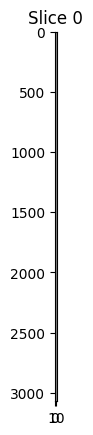

torch.Size([1, 2, 3072, 16])


Epoch 3/3 loss: 0.000:  89%|████████▉ | 51/57 [01:04<00:10,  1.78s/it]

-----------------------
Learning case 51 slice 0
Shape before patch: torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 1, 192, 16, 16])
torch.Size([1, 192, 2])
Shape after patch: torch.Size([1, 1, 192, 16, 16])
Shape after positional: torch.Size([1, 1, 192, 16, 16])
Shape after transformer: torch.Size([1, 1, 192, 16, 16])
Input shape before classification: torch.Size([1, 193, 2])
Shape after reshaping: torch.Size([1, 2, 192, 1])
Loss:  tensor(36.2369, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 192, 16, 16])


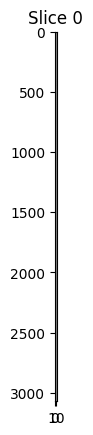

Epoch 3/3 loss: 0.000:  91%|█████████ | 52/57 [01:06<00:09,  1.88s/it]

torch.Size([1, 2, 3072, 16])
-----------------------
Learning case 52 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7586, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


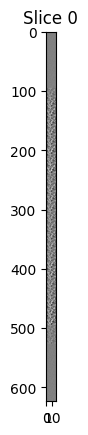

Epoch 3/3 loss: 0.000:  93%|█████████▎| 53/57 [01:07<00:05,  1.42s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 53 slice 0
Shape before patch: torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 1, 39, 16, 16])
torch.Size([1, 39, 2])
Shape after patch: torch.Size([1, 1, 39, 16, 16])
Shape after positional: torch.Size([1, 1, 39, 16, 16])
Shape after transformer: torch.Size([1, 1, 39, 16, 16])
Input shape before classification: torch.Size([1, 40, 2])
Shape after reshaping: torch.Size([1, 2, 39, 1])
Loss:  tensor(0.7484, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 39, 16, 16])


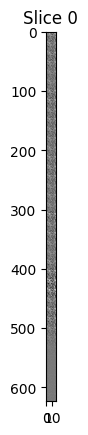

Epoch 3/3 loss: 0.000:  95%|█████████▍| 54/57 [01:07<00:03,  1.12s/it]

torch.Size([1, 2, 624, 16])
-----------------------
Learning case 54 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.1925, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


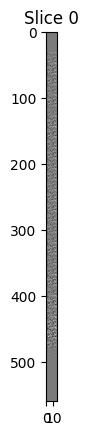

Epoch 3/3 loss: 0.000:  96%|█████████▋| 55/57 [01:07<00:01,  1.07it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 55 slice 0
Shape before patch: torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 1, 35, 16, 16])
torch.Size([1, 35, 2])
Shape after patch: torch.Size([1, 1, 35, 16, 16])
Shape after positional: torch.Size([1, 1, 35, 16, 16])
Shape after transformer: torch.Size([1, 1, 35, 16, 16])
Input shape before classification: torch.Size([1, 36, 2])
Shape after reshaping: torch.Size([1, 2, 35, 1])
Loss:  tensor(1.2480, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 35, 16, 16])


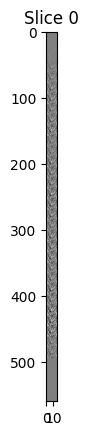

Epoch 3/3 loss: 0.000:  98%|█████████▊| 56/57 [01:08<00:00,  1.23it/s]

torch.Size([1, 2, 560, 16])
-----------------------
Learning case 56 slice 0
Shape before patch: torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 1, 36, 16, 16])
torch.Size([1, 36, 2])
Shape after patch: torch.Size([1, 1, 36, 16, 16])
Shape after positional: torch.Size([1, 1, 36, 16, 16])
Shape after transformer: torch.Size([1, 1, 36, 16, 16])
Input shape before classification: torch.Size([1, 37, 2])
Shape after reshaping: torch.Size([1, 2, 36, 1])
Loss:  tensor(0.7597, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
Shape after segmentation: torch.Size([1, 1, 36, 16, 16])


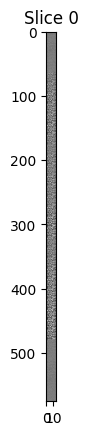

Epoch 3/3 loss: 0.000: 100%|██████████| 57/57 [01:08<00:00,  1.21s/it]

torch.Size([1, 2, 576, 16])
Epoch 3/3 loss: 1507.419


In [21]:
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

for epoch in range(epochs):
    training_loss = 0.0
    progress_bar = tqdm(
        enumerate(train_loader, 0),
        total=len(train_loader),
        desc=f'Epoch {epoch + 1}/{epochs} loss: {training_loss / len(train_loader):.3f}'
    )
    
    for i, data in progress_bar:
        # num_slices = len(data[0])

        cropped_images = dataset.get_cropped_locations(img=data[0], x_min=160, y_min=324, x_max=176, y_max=340)
        # cropped_labels = dataset.get_cropped_locations(img=data[1], x_min=160, y_min=324, x_max=176, y_max=340)

        num_slices = len(cropped_images)
        # print(num_slices)
        
        for j in range(num_slices):
            # print(cropped_images[0][0].shape)
            # print(data[0][j].shape)
            # print(data[1][j].shape)
            
            inputs = dataset.get_cropped_locations(img=data[0], x_min=160, y_min=324, x_max=176, y_max=340).float().to(device)
            labels = dataset.get_cropped_locations(img=data[1], x_min=160, y_min=324, x_max=176, y_max=340).float().to(device)

            # print(inputs.shape)
            # print(labels.shape)
            
            
            print('-----------------------')
            print(f'Learning case {i} slice {j}')
            
            optimizer.zero_grad()
            outputs, loss = transformer(inputs, labels)
            # outputs = F.interpolate(
            #     outputs,
            #     size=img_size,
            #     mode='bilinear',
            #     align_corners=False
            # )
            
            if labels.max() >= n_classes:
                labels = torch.clamp(labels, 0, n_classes-1)

            if epoch == 2:
                for i in range(outputs.shape[0]):  # Assuming outputs[0] is the batch dimension
                    img = outputs[0][i].cpu().detach().numpy()  # Move to CPU and convert to NumPy
                    plt.imshow(img.squeeze(), cmap='gray')  # Squeeze to remove single-dimensional entries
                    plt.title(f'Slice {i}')
                    plt.show()

            print(outputs.shape)
            batch, channel, num_slices, height, width = inputs.shape
            labels = labels.view(batch_size, height * num_slices, width)
            # labels = labels.long()
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()
            training_loss += loss.item()
        
    print(f'Epoch {epoch + 1}/{epochs} loss: {training_loss:.3f}')

In [22]:
import winsound

# Frequency (Hz) and duration (ms)
frequency = 1000  # Set frequency to 1000 Hz
duration = 500    # Set duration to 500 ms

# Play the sound
winsound.Beep(frequency, duration)

In [23]:
dir_path = 'experiments'

if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    
file_num = len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
torch.save(transformer.state_dict(), f'experiments/ViT{file_num + 1}.pth')

In [24]:
transformer.to(device)
transformer.load_state_dict(torch.load(f"Experiments/ViT{file_num+1}.pth"))
transformer.eval()

VisionTransformer(
  (patch_embedding): PatchEmbedding(
    (linear_project): Linear(in_features=256, out_features=2, bias=True)
  )
  (positional_encoding): PositionalEncoding()
  (transformer_encoder): Sequential(
    (0): TransformerEncoder(
      (ln1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
      (mha): MultiHeadAttention(
        (W_o): Linear(in_features=2, out_features=2, bias=True)
        (heads): ModuleList(
          (0-1): 2 x AttentionHead(
            (query): Linear(in_features=2, out_features=1, bias=True)
            (key): Linear(in_features=2, out_features=1, bias=True)
            (value): Linear(in_features=2, out_features=1, bias=True)
          )
        )
      )
      (ln2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=8, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=8, out_features=2, bias=True)
      )
    )
    (1): TransformerEnco

In [25]:
def predict(model, image):
    model.eval()
    
    with torch.no_grad():
        image = image.to(device)
        output = model(image)
        output = F.interpolate(output, size=img_size, mode='bilinear', align_corners=False)
        prediction = torch.argmax(output, dim=1)
        
    return prediction.cpu().numpy()

In [26]:
val_loss = 0.0
predicted = []

length = len(test_loader)
case = 0 
with torch.no_grad():
    for i, val_batch in tqdm(enumerate(test_loader, 0)):
        # num_slices = len(val_batch[0])
        val_slices = []
        one_case = []
        val_masks = []

        cropped_images = dataset.get_cropped_locations(img=val_batch[0], x_min=160, y_min=324, x_max=176, y_max=340)
        cropped_labels = dataset.get_cropped_locations(img=val_batch[1], x_min=160, y_min=324, x_max=176, y_max=340)

        num_slices = len(cropped_images)
        for j in range(num_slices):
            print(f'Predicting case {i} slice {j}')
            val_images = cropped_images[j].unsqueeze(0).unsqueeze(0).float().to(device)
            val_mask = cropped_labels[j].unsqueeze(0).float().to(device) 
            
            predicted_mask = predict(transformer, val_images)
 
            predicted_mask = torch.from_numpy(predicted_mask).unsqueeze(1).to(device).float()
            predicted_mask = F.interpolate(
                predicted_mask, 
                size=img_size, 
                mode='nearest'
            ).squeeze(1)

            val_loss += criterion(predicted_mask, val_mask).item() 
            val_slices.append(predicted_mask)
            val_masks.append(val_mask)
            
            print('Loss:', val_loss)
        one_case.append(val_slices)
        one_case.append(val_masks)
        predicted.append(one_case)
        case += 1

print(f' Final Validation Loss: {val_loss}')

0it [00:02, ?it/s]

Predicting case 0 slice 0


ValueError: too many values to unpack (expected 5)

In [46]:
plot_all_slices_from_array(predicted, case_index=14)

Case 14: Number of slices: 192
Slice 0 unique values: 0.0
Slice 1 unique values: 0.0
Slice 2 unique values: 0.0
Slice 3 unique values: 0.0
Slice 4 unique values: 0.0
Slice 5 unique values: 0.0
Slice 6 unique values: 0.0
Slice 7 unique values: 0.0
Slice 8 unique values: 0.0
Slice 9 unique values: 0.0
Slice 10 unique values: 0.0
Slice 11 unique values: 0.0
Slice 12 unique values: 0.0
Slice 13 unique values: 0.0
Slice 14 unique values: 0.0
Slice 15 unique values: 0.0
Slice 16 unique values: 0.0
Slice 17 unique values: 0.0
Slice 18 unique values: 0.0
Slice 19 unique values: 0.0
Slice 20 unique values: 0.0
Slice 21 unique values: 0.0
Slice 22 unique values: 0.0
Slice 23 unique values: 0.0
Slice 24 unique values: 0.0
Slice 25 unique values: 0.0
Slice 26 unique values: 0.0
Slice 27 unique values: 0.0
Slice 28 unique values: 0.0
Slice 29 unique values: 0.0
Slice 30 unique values: 0.0
Slice 31 unique values: 0.0
Slice 32 unique values: 0.0
Slice 33 unique values: 0.0
Slice 34 unique values: 0.0

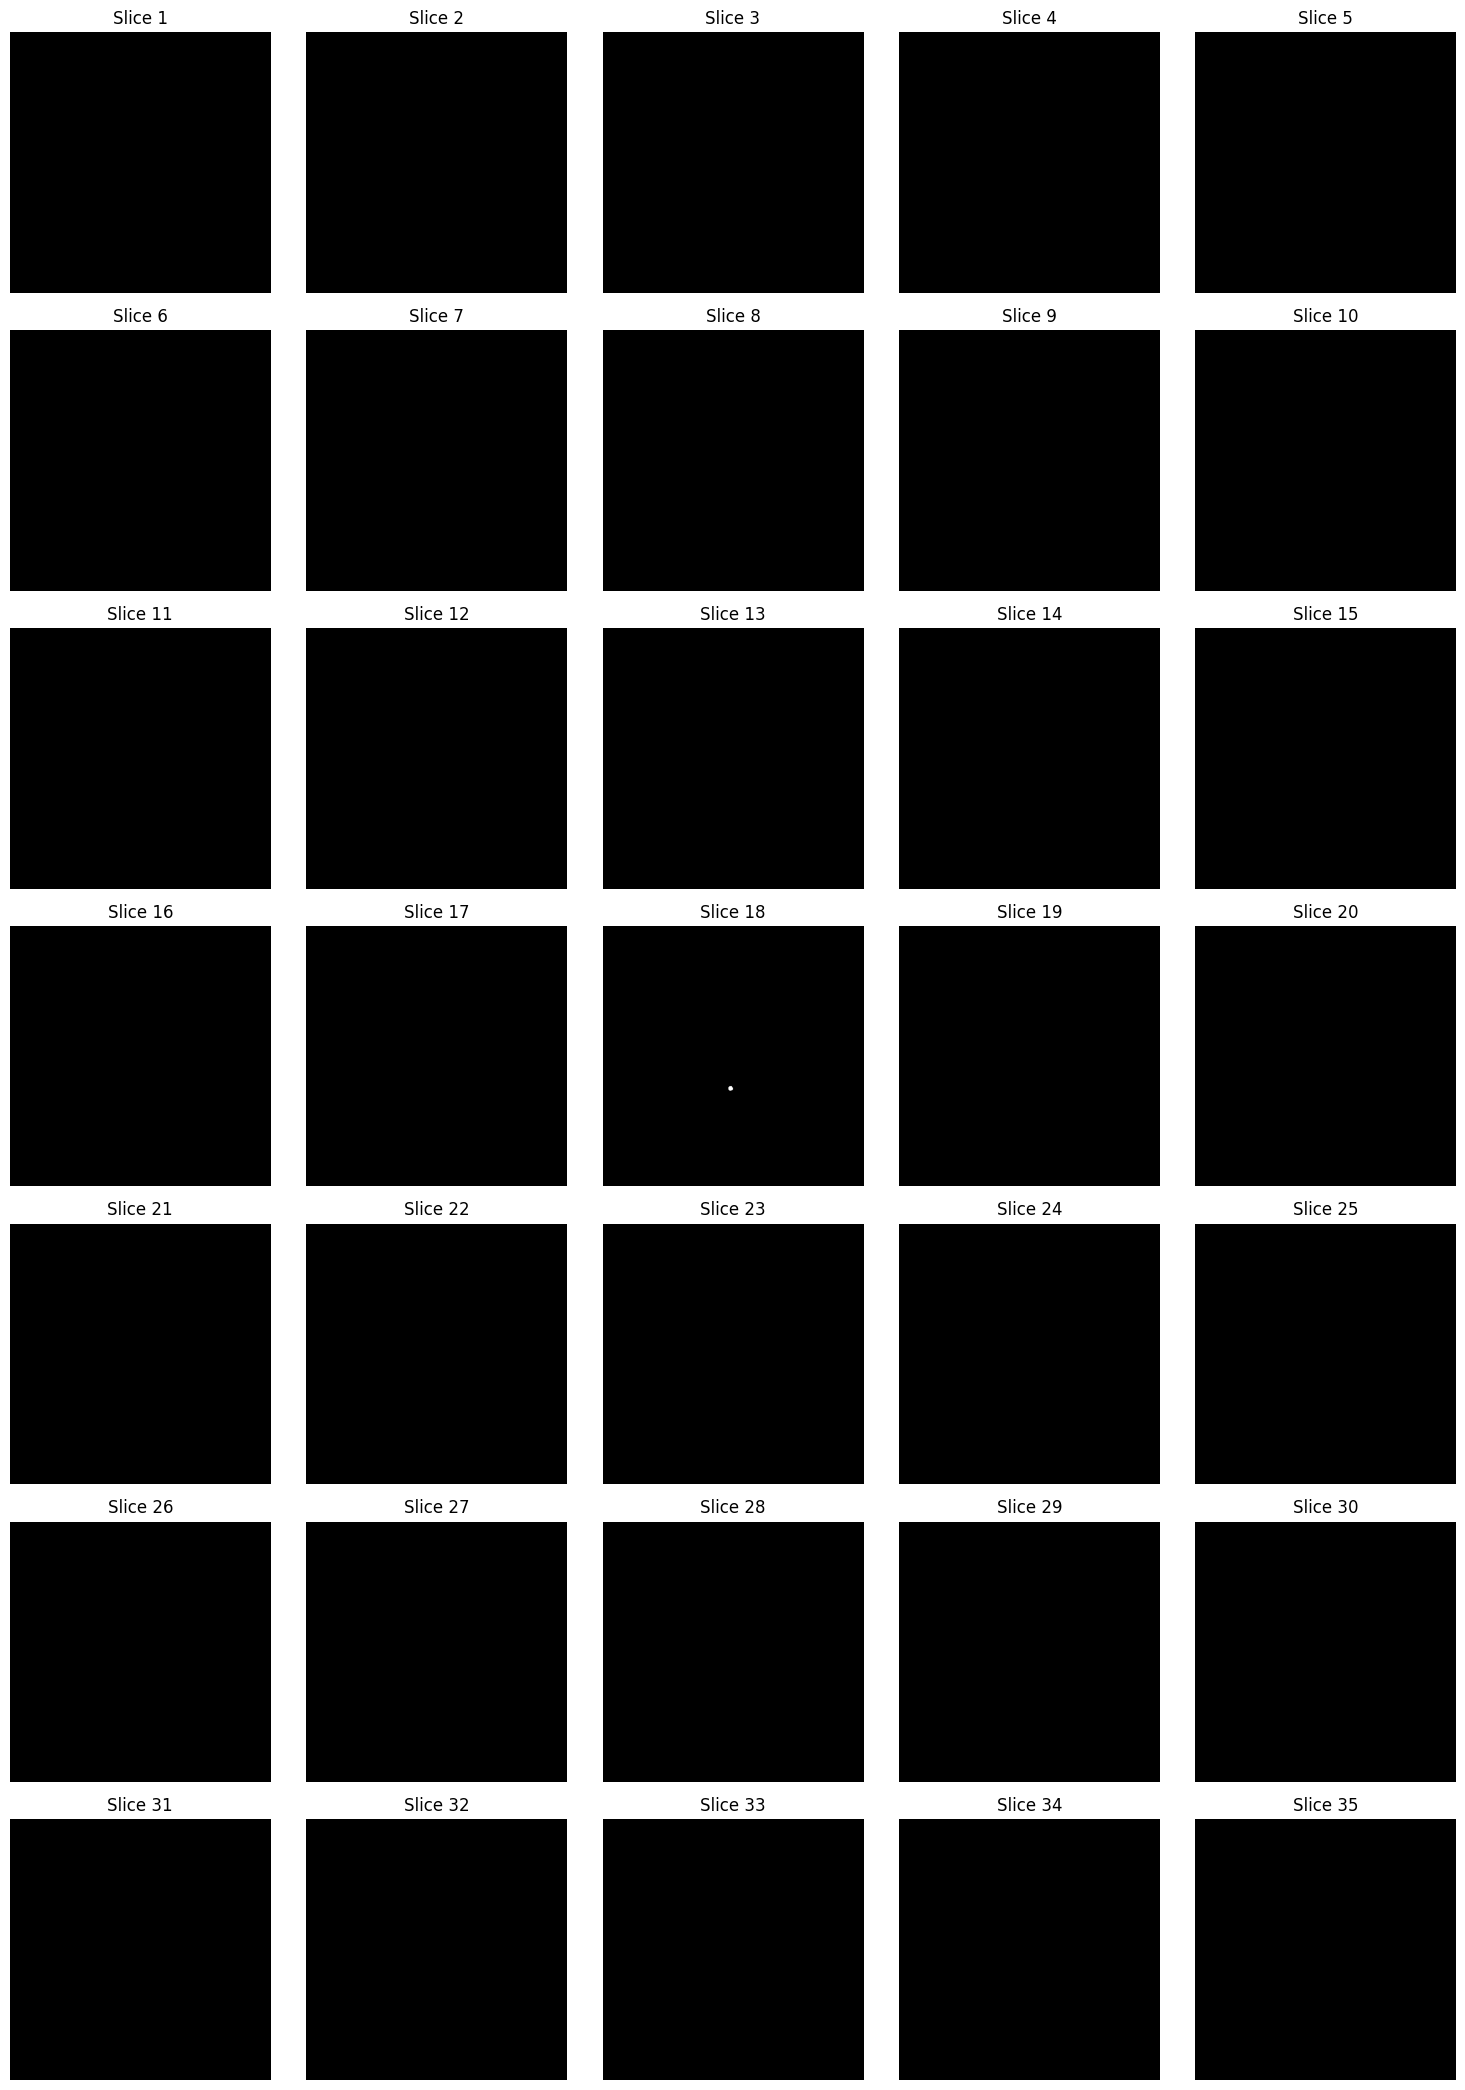

In [41]:
plot_all_slices(masks[1])